In [1]:
import numpy as np
import pyogrio
import geopandas as gpd
from tqdm import tqdm
import matplotlib.pyplot as plt

insar_data_path = "C:/Users/eleonore.kong/Documents/InSAR/DATA/grid_stats_agg_lpf.gpkg"
layer = 'grid_500m'
output = "C:/Users/eleonore.kong/Documents/InSAR/DATA/"

In [9]:
gdf = pyogrio.read_dataframe(insar_data_path, layer=layer)
# columns_to_keep = [column for column in gdf.columns if 'Max' not in column]
# columns_to_keep = [column for column in columns_to_keep if 'Min' not in column]
# columns_to_keep = [column for column in columns_to_keep if 'Mean' not in column]
# gdf = gdf[columns_to_keep]

In [10]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 560384 entries, 0 to 560383
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   grid_500m           560384 non-null  float64 
 1   summer_2016_median  525153 non-null  float64 
 2   summer_2016_p75     525153 non-null  float64 
 3   summer_2017_median  529809 non-null  float64 
 4   summer_2017_p75     529809 non-null  float64 
 5   summer_2018_median  537885 non-null  float64 
 6   summer_2018_p75     537885 non-null  float64 
 7   summer_2019_median  537759 non-null  float64 
 8   summer_2019_p75     537759 non-null  float64 
 9   summer_2020_median  534423 non-null  float64 
 10  summer_2020_p75     534423 non-null  float64 
 11  summer_2021_median  500753 non-null  float64 
 12  summer_2021_p75     500753 non-null  float64 
 13  winter_2016_median  445733 non-null  float64 
 14  winter_2016_p75     445733 non-null  float64 
 15  winter_20

In [11]:
link = pyogrio.read_dataframe("C:/Users/eleonore.kong/Documents/InSAR/DATA/tables_link.gpkg", layer='grid_rga_swi_link')
link = link.drop('geometry', axis=1)
gdf = gdf.merge(link, on=layer)
gdf

,grid_500m,summer_2016_median,summer_2016_p75,summer_2017_median,summer_2017_p75,summer_2018_median,summer_2018_p75,summer_2019_median,summer_2019_p75,summer_2020_median,...,summer_min_swi_2019,summer_min_swi_2020,summer_min_swi_2021,winter_summer_swi_diff,winter_summer_swi_diff_2016,winter_summer_swi_diff_2017,winter_summer_swi_diff_2018,winter_summer_swi_diff_2019,winter_summer_swi_diff_2020,winter_summer_swi_diff_2021
0,57380.0,0.003071,0.003823,0.001613,0.001613,0.000855,0.000855,0.004147,0.004147,0.002973,...,0.946,0.945,0.945,0.551,0.444,0.169,0.396,0.333,0.498,0.441
1,59340.0,0.006148,0.006148,0.003672,0.003672,0.005196,0.005196,0.003022,0.003022,0.004512,...,0.946,0.945,0.945,0.551,0.444,0.169,0.396,0.333,0.498,0.441
2,114230.0,0.002483,0.002483,0.001354,0.001354,0.001564,0.001564,NaN,NaN,0.002088,...,0.364,0.366,0.384,1.119,0.988,0.673,0.972,0.908,1.062,1.020
3,114303.0,0.000499,0.000499,0.000393,0.000393,0.001450,0.001450,0.001426,0.001426,0.001019,...,0.340,0.358,0.350,1.077,1.042,0.758,0.982,0.932,1.008,1.023
4,116178.0,0.002408,0.002408,0.002344,0.002344,0.002024,0.002024,0.001440,0.001440,0.002211,...,0.364,0.366,0.384,1.119,0.988,0.673,0.972,0.908,1.062,1.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560295,4435931.0,0.004076,0.004076,0.003022,0.003022,0.002423,0.002423,0.003385,0.003385,0.002748,...,0.188,0.172,0.334,1.062,0.831,0.602,1.075,0.727,0.910,0.818
560296,4435932.0,0.002391,0.002495,0.002013,0.002567,0.001253,0.002328,0.000961,0.001054,0.002492,...,0.188,0.172,0.334,1.062,0.831,0.602,1.075,0.727,0.910,0.818
560297,4439849.0,0.001300,0.001300,0.000631,0.000631,0.001200,0.001200,0.000667,0.000667,0.000660,...,0.188,0.172,0.334,1.062,0.831,0.602,1.075,0.727,0.910,0.818
560298,4443768.0,0.003712,0.003712,0.005897,0.005897,0.006974,0.006974,0.007851,0.007851,0.007810,...,0.188,0.172,0.334,1.062,0.831,0.602,1.075,0.727,0.910,0.818


In [12]:
grouped = gdf.groupby('NIVEAU').mean(numeric_only=True)
grouped

,grid_500m,summer_2016_median,summer_2016_p75,summer_2017_median,summer_2017_p75,summer_2018_median,summer_2018_p75,summer_2019_median,summer_2019_p75,summer_2020_median,...,summer_min_swi_2019,summer_min_swi_2020,summer_min_swi_2021,winter_summer_swi_diff,winter_summer_swi_diff_2016,winter_summer_swi_diff_2017,winter_summer_swi_diff_2018,winter_summer_swi_diff_2019,winter_summer_swi_diff_2020,winter_summer_swi_diff_2021
NIVEAU,,,,,,,,,,,,,,,,,,,,,
0.0,2.236769e+06,0.003566,0.003913,0.003466,0.003720,0.003874,0.004147,0.003735,0.003999,0.003807,...,0.295431,0.317506,0.412001,1.109761,0.866092,0.745547,0.958718,0.858411,0.999794,0.848921
1.0,2.205820e+06,0.003288,0.003665,0.003350,0.003641,0.003751,0.004074,0.003576,0.003882,0.003721,...,0.268987,0.286670,0.431639,1.144978,0.929904,0.758020,1.039126,0.900137,1.046904,0.867430
2.0,2.487027e+06,0.003558,0.003963,0.003588,0.003909,0.003968,0.004313,0.003828,0.004166,0.003914,...,0.249291,0.258281,0.385435,1.115320,0.875895,0.756083,1.001954,0.875764,1.018184,0.848255
3.0,2.276975e+06,0.003985,0.004385,0.003937,0.004257,0.004303,0.004642,0.004238,0.004580,0.004252,...,0.227280,0.238093,0.308755,1.069157,0.818870,0.700713,0.915806,0.821420,0.981460,0.872332


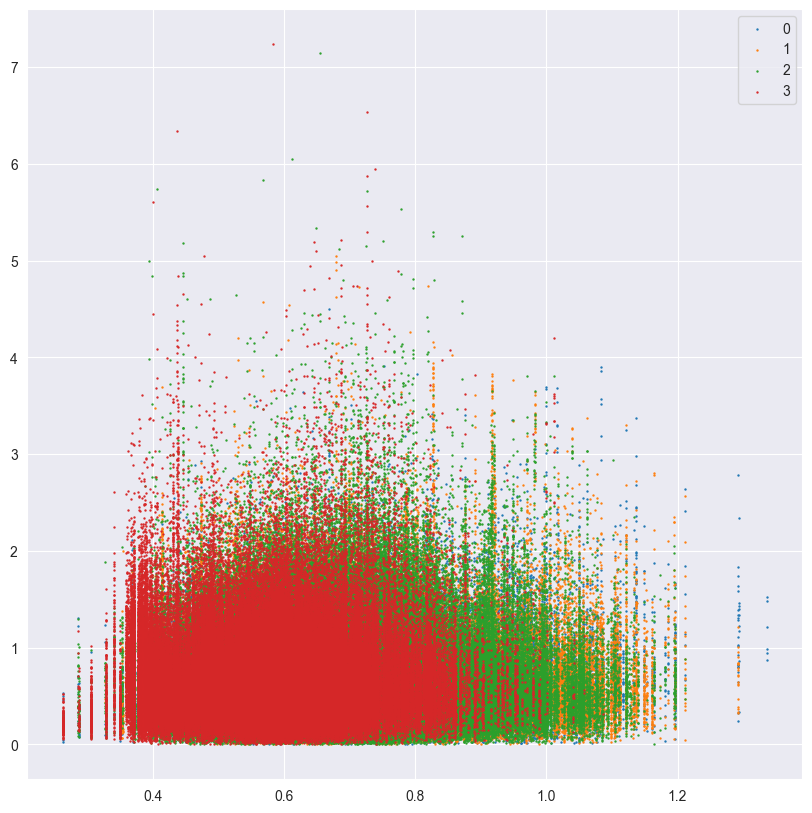

In [19]:
plt.figure(figsize=(10,10))
for i in range(4):
    
    rga3 = gdf.loc[gdf['NIVEAU'] == i, :]
    plt.scatter(rga3['annual_mean_swi_2017'],rga3['Detrended Amplitude_2017_median'], s=0.5, label=i)
    plt.legend()

In [10]:
for i in range(4):
    rga3 = gdf.loc[gdf['NIVEAU'] == i, :]
    counts_list= []
    legend=[]
    for column in gdf.columns[3:8]:
        plt.figure(figsize=(15,5))
        data_yr = rga3.loc[:, column]
    
        counts, bins = np.histogram(data_yr, bins=200)
        counts_list.append(counts)
        legend.append(column)
    
    for counts in counts_list:
        plt.stairs(counts, bins)
        plt.legend(legend)
        
    plt.xlim(0,3)
    # plt.ylim(0,25000)
    
    plt.title('NV'+str(i)+' - Detrended Amplitudes Distribution per year')
    plt.savefig('figures/N'+str(i)+' Amplitudes per year.jpg')
    plt.close()

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [ ]:
color = {0: 'blue', 1: 'yellow', 2: 'red', 3: 'purple'}
for column in gdf.columns[1:]:
    plt.figure(figsize=(15,5))
    if column != 'geometry':
        rga0 = gdf.loc[gdf['NIVEAU'] == 0, column]
        rga1 = gdf.loc[gdf['NIVEAU'] == 1, column]
        rga2 = gdf.loc[gdf['NIVEAU'] == 2, column]
        rga3 = gdf.loc[gdf['NIVEAU'] == 3, column]
        rga_data = [rga0, rga1, rga2, rga3]

        for i in range(len(rga_data)):
            # plt.hist(rga0, bins=200, density=True, histtype='step', color='blue', linewidth=1, label='NIVEAU 0')
            # plt.hist(rga1, bins=200, density=True, histtype='step', color='yellow', linewidth=1, label='NIVEAU 1')
            # plt.hist(rga2, bins=200, density=True, histtype='step', color='red', linewidth=1, label='NIVEAU 2')
            # plt.hist(rga3, bins=200, density=True, histtype='step', color='purple', linewidth=1, label='NIVEAU 3')

            counts, bins = np.histogram(rga_data[i], bins=200, density=True)
            # counts = counts/len(rga_data[i])
            plt.stairs(counts, bins, color=color[i], label='NIVEAU '+str(i))

        # plt.xlim(0,1.5)
        plt.plot()
        plt.legend()
        plt.title(column)
        plt.savefig('figures/'+column+'_zoom.jpg')
        plt.close()

In [ ]:
# for column in gdf.columns[1:2]:
#     if column != 'geometry':
diff_swi_hi = gdf.loc[gdf['winter_summer_swi_diff'] >= 1.22]
diff_swi_med = gdf.loc[(gdf['winter_summer_swi_diff'] > 0.97) & (gdf['winter_summer_swi_diff'] <1.22)]
diff_swi_lo = gdf.loc[gdf['winter_summer_swi_diff'] <=0.97]

data = [diff_swi_hi, diff_swi_med, diff_swi_lo]
fig, axs = plt.subplots(3, 1, figsize=(15, 10))

title = ['diff_swi_hi >1.15', 'diff_swi_med >1.05', 'diff_swi_lo <1.05']

for i in range(len(data)):
    color = {0: 'blue', 1: 'yellow', 2: 'red', 3: 'purple'}
    for rga_lvl in [0,1,2,3]:
        df_rga_lvl = data[i].loc[gdf['NIVEAU'] == rga_lvl]['Detrended Amplitude_median']
        # axs[i].hist(df_rga_lvl, bins=200, density=True, histtype='step', color=color[rga_lvl], linewidth=1, label='NIVEAU '+str(rga_lvl))
        counts, bins = np.histogram(df_rga_lvl, bins=200, density=True)
        # counts = counts/len(df_rga_lvl)
        axs[i].stairs(counts, bins, color=color[rga_lvl], label='NIVEAU '+str(rga_lvl))

    axs[i].legend()
    axs[i].set_title(title[i])
    axs[i].set_ylim((0,3))
    axs[i].set_xlim((0,4))

# plt.title(column)
plt.savefig('figures/Detrended Amplitude_median_by_swi_diff.jpg')
plt.show()
# plt.close()

In [ ]:
summer_swi_hi = gdf.loc[gdf['summer_min_swi'] >= 0.32]
summer_swi_med = gdf.loc[(gdf['summer_min_swi'] > 0.17) & (gdf['summer_min_swi'] <0.32)]
summer_swi_lo = gdf.loc[gdf['summer_min_swi'] <=0.17]

data = [summer_swi_hi, summer_swi_med, summer_swi_lo]
fig, axs = plt.subplots(4, 1, figsize=(15, 23))

title = ['NIVEAU 0', 'NIVEAU 1', 'NIVEAU 2', 'NIVEAU 3']
label = ['summer_swi_hi >0.26', 'summer_swi_med >0.21', 'summer_swi_lo <0.21']

for i in range(len(data)):
    color = {0: 'red', 1: 'yellow', 2: 'blue'}
    for rga_lvl in [0,1,2,3]:
        df_rga_lvl = data[i].loc[gdf['NIVEAU'] == rga_lvl]['Detrended Amplitude_median']
        counts, bins = np.histogram(df_rga_lvl, bins=200, density=True)
        # counts = counts/len(df_rga_lvl)
        axs[rga_lvl].stairs(counts, bins, color=color[i], label=label[i])
        axs[rga_lvl].set_title(title[rga_lvl])

        axs[rga_lvl].legend()      
        axs[rga_lvl].set_ylim((0,3))    
        axs[rga_lvl].set_xlim((0,4))

# plt.title(column)
plt.savefig('figures/Detrended Amplitude_median_swi_summer_by_lvl.jpg')
plt.show()
# plt.close()

In [ ]:
color = {2016: 'darkorange', 2017: 'yellowgreen', 2018: 'blue', 2019: 'darkturquoise', 2020: 'darkslateblue', 2021: 'darkviolet'}

plt.figure(figsize=(15,5))
for rga_lvl in [0,1,2,3]:
    rga0 = gdf.loc[gdf['NIVEAU'] == rga_lvl,:]

    for year in [2016,2017,2018,2019,2020,2021]:
        column = 'Detrended Amplitude_'+ str(year)
        rga_yr = gdf.loc[:, column]
        counts, bins = np.histogram(rga_yr, bins=200, density=True)
        # counts = counts/len(rga_data[i])
        plt.stairs(counts, bins, color=color[year], label='year '+str(year))

        plt.xlim(0,2)
        plt.plot()
        plt.legend()
        plt.title(column)
        plt.savefig('figures_points/niveau_'+str(rga_lvl)+'.jpg')
        plt.close()

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset (You can use any dataset)
# Example using sklearn's Iris dataset

# Create a DataFrame for easy manipulation
columns_to_keep = [column for column in gdf.columns if 'Max' not in column]
columns_to_keep = [column for column in columns_to_keep if 'Min' not in column]
columns_to_keep = [column for column in columns_to_keep if 'Mean' not in column]
columns_to_keep = [column for column in columns_to_keep if 'First' not in column]


# df = gdf[['Detrended Amplitude_2018_median','Max Value_summer_2018_median', 'Max Value_winter_2018_median','Min Value_summer_2018_median',
#           'Min Value_winter_2018_median', 'Mean Value_summer_2018_median', 'Mean Value_winter_2018_median', 'annual_mean_swi_2018',
#           'winter_mean_swi_2018', 'summer_mean_swi_2018', 'winter_summer_swi_diff_2018', 'NIVEAU']]
df = gdf[columns_to_keep]
# df = df.drop([layer,'geometry'], axis=1)
target = gdf['NIVEAU'].values

In [ ]:
# Step 3: Standardize the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 4: Apply PCA
pca = PCA(n_components=5)  # Reducing to 2 components for visualization
pca_result = pca.fit_transform(df_scaled)

In [ ]:
# Step 5: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5']) #, 'PC7', 'PC8', 'PC9', 'PC10'
pca_df['Target'] = target

# Step 6: Plot the Explained Variance Ratio
plt.figure(figsize=(6,4))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='blue', alpha=0.7)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Each Component')
plt.show()

In [ ]:
# Step 7: Visualize PCA Result
fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111, projection='3d')
# sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
#                 c=target, cmap='Set1', s=10, alpha=0.8)
sns.scatterplot(x='PC1', y='PC2', hue=target, palette='Set1', data=pca_df, s=8, alpha=0.8) #
# ax.view_init(elev=100, azim=45)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# plt.xlim(-5,10)
# plt.ylim(-6,6)
# plt.zlim(-10,0)
plt.title('PCA - 2 Components')
# fig.colorbar(sc)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_scaled is the standardized data, and pca is already fitted
components = pca.components_  # Get PCA components
n_pcs = pca.n_components_  # Number of principal components

# Step 1: Calculate the correlation between original variables and PCs
correlations = components.T * np.sqrt(pca.explained_variance_)

# Step 2: Plot the correlation circle
plt.figure(figsize=(10, 10))

# Plot unit circle
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Add each variable as a vector
for i, (var_name, coord) in enumerate(zip(df.columns, correlations)):
    plt.arrow(0, 0, coord[0], coord[1], color='r', alpha=0.5)
    plt.text(coord[0] * 1.1, coord[1] * 1.1, var_name,  color='g', ha='center', va='center')

# Formatting the plot
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('PC2')
plt.ylabel('PC3')
# plt.title('Variable Correlation Circle (PC5 vs PC6)')
plt.grid()

plt.show()


In [ ]:

# Get the explained variance for scaling
explained_variance = np.sqrt(pca.explained_variance_)

# Calculate the correlation of each variable with PC1
correlations_with_pc1 = components[0, :] * explained_variance[0]
correlations_with_pc2 = components[1, :] * explained_variance[1]
correlations_with_pc3 = components[2, :] * explained_variance[2]
correlations_with_pc4 = components[3, :] * explained_variance[3]
correlations_with_pc5 = components[4, :] * explained_variance[4]
correlations_with_pc6 = components[5, :] * explained_variance[5]

# Create a DataFrame to store the variables and their correlations
correlation_df = pd.DataFrame({
    'Variable': df.columns,
    'Correlation_with_PC1': correlations_with_pc1,
    'Correlation_with_PC2': correlations_with_pc2,
    'Correlation_with_PC3': correlations_with_pc3,
    'Correlation_with_PC4': correlations_with_pc4,
    'Correlation_with_PC5': correlations_with_pc5,
    'Correlation_with_PC6': correlations_with_pc6,
    
})

# Sort the DataFrame by the absolute correlation values in descending order
correlation_df['PC1_Abs_Correlation'] = correlation_df['Correlation_with_PC1'].abs()
correlation_df['PC2_Abs_Correlation'] = correlation_df['Correlation_with_PC2'].abs()
correlation_df['PC3_Abs_Correlation'] = correlation_df['Correlation_with_PC3'].abs()
correlation_df['PC4_Abs_Correlation'] = correlation_df['Correlation_with_PC4'].abs()
correlation_df['PC5_Abs_Correlation'] = correlation_df['Correlation_with_PC5'].abs()
correlation_df['PC6_Abs_Correlation'] = correlation_df['Correlation_with_PC6'].abs()
# correlation_df_sorted = correlation_df.sort_values(by='Abs_Correlation', ascending=False)

# Display the ranked variables by correlation with PC1
correlation_df

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Step 1: Calculate the correlation matrix
corr_matrix = df.corr()



In [ ]:
# Step 2: Create a correlogram (heatmap)
plt.figure(figsize=(40, 36))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Step 3: Add plot formatting
plt.title('Correlogram of Variables')
plt.show()